This notebook focuses on analyzing datasets and implementing machine learning models to study algorithmic behaviors and performance. It includes steps for data preprocessing, exploratory data analysis, model training, and evaluation.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('milknew[152].csv')
df2=pd.read_csv('monthly-milk-production.csv')
print(df1.head())
print(df2.head())


    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium
                 Month  Milk Production
0  1962-01-01 01:00:00            589.0
1  1962-02-01 01:00:00            561.0
2  1962-03-01 01:00:00            640.0
3  1962-04-01 01:00:00            656.0
4  1962-05-01 01:00:00            727.0


In [6]:
print(df1.info())
print(df2.info())
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df1.describe())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            168 non-null    object 
 1   Milk Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB
None
976
0
                pH   Temprature        Taste         Odor        

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df1=pd.read_csv('milknew[152].csv')
#df1['Grade']=LabelEncoder().fit_transform(df1['Grade'])
#df1=pd.DataFrame(df1)
#print(df1.head())
df1=pd.get_dummies(df1,columns=['Grade'])
print(df1.head())



    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade_high  \
0  6.6          35      1     0     1          0     254        True   
1  6.6          36      0     1     0          1     253        True   
2  8.5          70      1     1     1          1     246       False   
3  9.5          34      1     1     0          1     255       False   
4  6.6          37      0     0     0          0     255       False   

   Grade_low  Grade_medium  
0      False         False  
1      False         False  
2       True         False  
3       True         False  
4      False          True  
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade_high  \
0  6.6          35      1     0     1          0     254        True   
1  6.6          36      0     1     0          1     253        True   
2  8.5          70      1     1     1          1     246       False   
3  9.5          34      1     1     0          1     255       False   
4  6.6          37      0     0  

In [47]:
X=df1.drop(['Grade_high','Grade_medium','Grade_low'],axis=1)
y=df1[['Grade_high','Grade_medium','Grade_low']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [76]:
model_lr=LogisticRegression(multi_class='ovr')
model_dt=DecisionTreeClassifier()
model_knn=KNeighborsClassifier(n_neighbors=5)
model_svc=SVC(probability=True,kernel='rbf')
model_ann=Sequential()
model_ann.add(Flatten())
model_ann.add(Dense(256,activation='relu'))
model_ann.add(Dense(128,activation='relu'))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(32,activation='relu'))
model_ann.add(Dense(3,activation='softmax'))
model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
model_ann.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6160 - loss: 0.9417 - val_accuracy: 0.6824 - val_loss: 0.6172
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7998 - loss: 0.4618 - val_accuracy: 0.9412 - val_loss: 0.2493
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9416 - loss: 0.1869 - val_accuracy: 0.9412 - val_loss: 0.1443
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.1115 - val_accuracy: 0.9471 - val_loss: 0.1107
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.0759 - val_accuracy: 0.9471 - val_loss: 0.0919
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.0833 - val_accuracy: 0.9471 - val_loss: 0.1038
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9622 - loss: 0.0810 - val_accuracy: 0.9471 - val_loss: 0.1079
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.0924 - val_accuracy: 0.9471 - 

In [50]:
y_pred_ml=y_train[['Grade_high','Grade_medium','Grade_low']].idxmax(axis=1).map({'Grade_high':1,'Grade_medium':2,'Grade_low':3})
y_pred_ml_test=y_test[['Grade_high','Grade_medium','Grade_low']].idxmax(axis=1).map({'Grade_high':1,'Grade_medium':2,'Grade_low':3})

In [77]:
model_lr.fit(X_train,y_pred_ml)
model_dt.fit(X_train,y_pred_ml)
model_knn.fit(X_train,y_pred_ml)
model_svc.fit(X_train,y_pred_ml)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


SVC(probability=True)

In [84]:
from sklearn.metrics import accuracy_score,log_loss
acc_ann=accuracy_score(tf.argmax(y_train,axis=1),tf.argmax(model_ann.predict(X_train),axis=1))
loss_ann=log_loss(tf.argmax(y_train, axis=1),model_ann.predict(X_train))
acc_lr=accuracy_score(y_pred_ml,model_lr.predict(X_train))
loss_lr=log_loss(y_pred_ml,model_lr.predict_proba(X_train))
acc_dt=accuracy_score(y_pred_ml,model_dt.predict(X_train))
loss_dt=log_loss(y_pred_ml,model_dt.predict_proba(X_train))
acc_svc=accuracy_score(y_pred_ml,model_svc.predict(X_train))
loss_svc=log_loss(y_pred_ml,model_svc.predict_proba(X_train))
acc_knn=accuracy_score(y_pred_ml,model_knn.predict(X_train))
loss_knn=log_loss(y_pred_ml,model_knn.predict_proba(X_train))

acc_ann_t=accuracy_score(tf.argmax(y_test,axis=1),tf.argmax(model_ann.predict(X_test),axis=1))
loss_ann_t=log_loss(tf.argmax(y_test, axis=1),model_ann.predict(X_test))
acc_lr_t=accuracy_score(y_pred_ml_test,model_lr.predict(X_test))
loss_lr_t=log_loss(y_pred_ml_test,model_lr.predict_proba(X_test))
acc_dt_t=accuracy_score(y_pred_ml_test,model_dt.predict(X_test))
loss_dt_t=log_loss(y_pred_ml_test,model_dt.predict_proba(X_test))
acc_svc_t=accuracy_score(y_pred_ml_test,model_svc.predict(X_test))
loss_svc_t=log_loss(y_pred_ml_test,model_svc.predict_proba(X_test))
acc_knn_t=accuracy_score(y_pred_ml_test,model_knn.predict(X_test))
loss_knn_t=log_loss(y_pred_ml_test,model_knn.predict_proba(X_test))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [85]:
columns=pd.MultiIndex.from_tuples([('Train','accuracy'),('Train','loss'),('Test','accuracy'),('Test','loss')])
index=['ANN','Logistic Regression','Decision Tree','KNN','SVC']
data=[[acc_ann,loss_ann,acc_ann_t,loss_ann_t],[acc_lr,loss_lr,acc_lr_t,loss_lr_t],[acc_dt,loss_dt,acc_dt_t,loss_dt_t],[acc_knn,loss_knn,acc_knn_t,loss_knn_t],[acc_svc,loss_svc,acc_svc_t,loss_svc_t]]
results=pd.DataFrame(columns=columns, index=index,data=data)


In [86]:
results.head()

Train                    Test          
                     accuracy          loss  accuracy      loss
ANN                  0.997639  1.267130e-02  0.995283  0.035419
Logistic Regression  0.846517  4.630662e-01  0.811321  0.502345
Decision Tree        1.000000  2.220446e-16  0.990566  0.340034
KNN                  0.996458  7.529984e-03  0.976415  0.197804
SVC                  0.957497  1.221886e-01  0.929245  0.199224

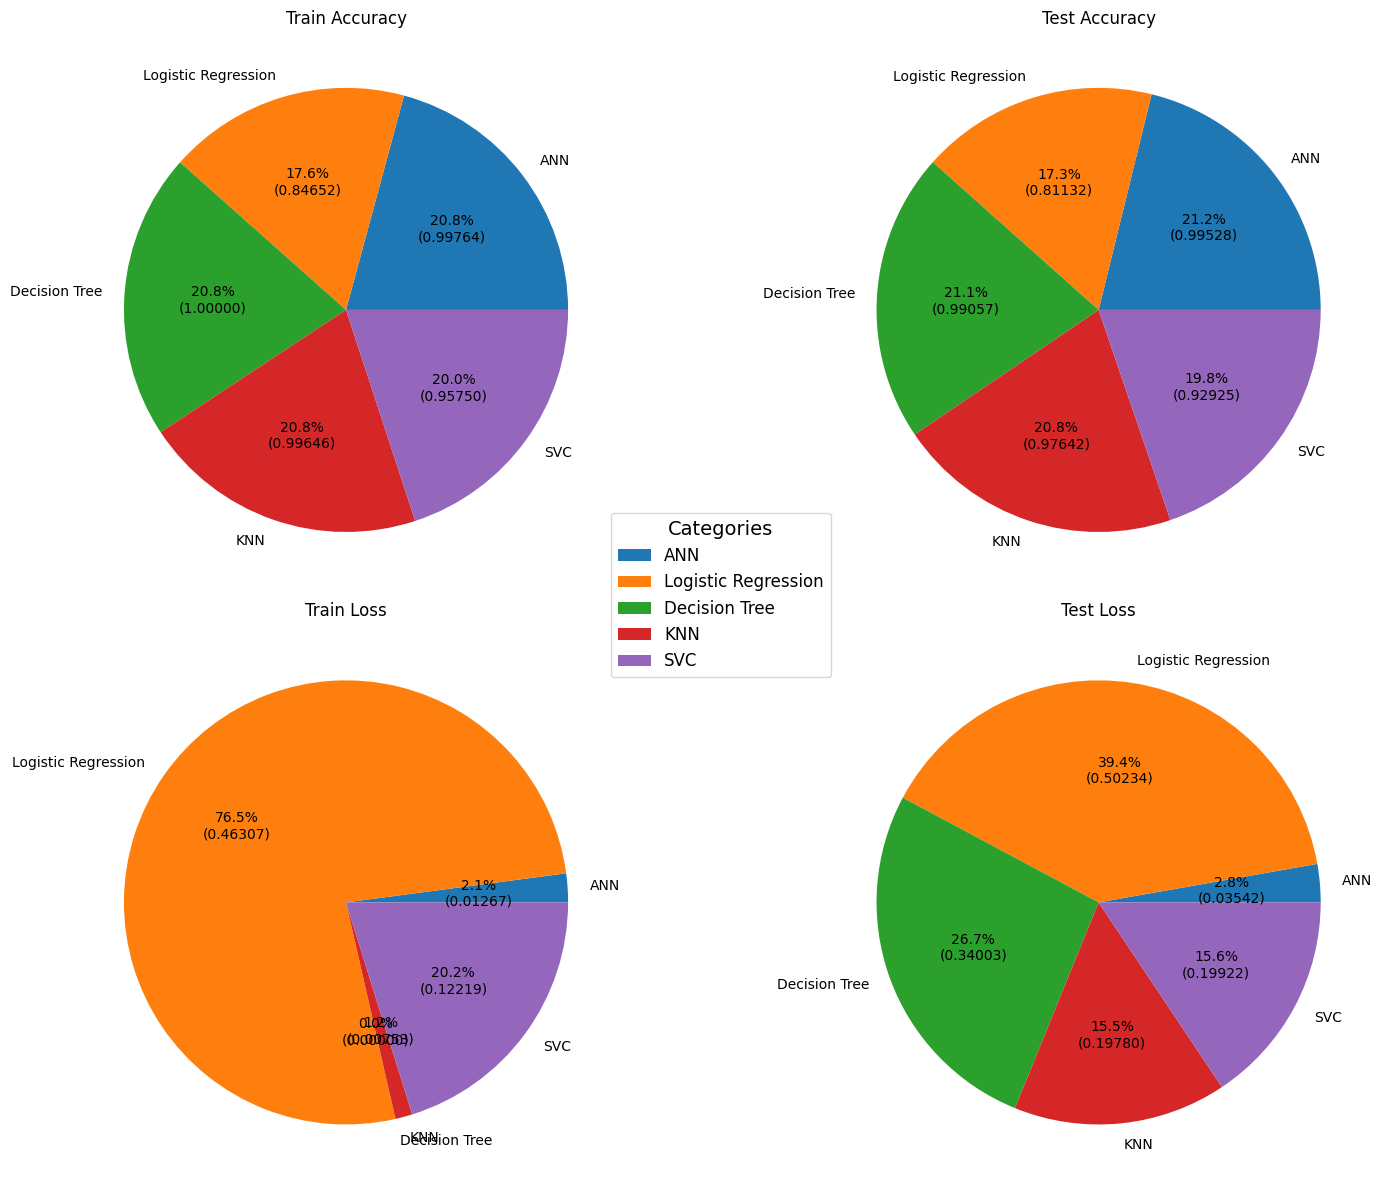

In [107]:
def autopct_format(pct, values):
    absolute = pct / 100.0 * sum(values)
    return f"{pct:.1f}%\n({absolute:.5f})"

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
axes[0, 0].pie(results['Train']['accuracy'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Train']['accuracy']))
axes[0, 0].set_title('Train Accuracy')
axes[0, 1].pie(results['Test']['accuracy'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Test']['accuracy']))
axes[0, 1].set_title('Test Accuracy')
axes[1, 0].pie(results['Train']['loss'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Train']['loss']))
axes[1, 0].set_title('Train Loss')
axes[1, 1].pie(results['Test']['loss'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Test']['loss']))
axes[1, 1].set_title('Test Loss')

fig.legend(
    results.index,
    loc='center',
    bbox_to_anchor=(0.5, 0.5),
    fontsize=12,
    title="Categories",
    title_fontsize=14
)
plt.tight_layout()
plt.show()



In [108]:
df2.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler=MinMaxScaler()
df2=pd.read_csv('monthly-milk-production.csv')
df2['Milk Production']=scaler.fit_transform(df2['Milk Production'].values.reshape(-1,1))
X_train=df2['Milk Production'][:130].values.reshape(-1,1)
y_train=df2['Milk Production'][1:131].values.reshape(-1,1)
X_test=df2['Milk Production'][130:-1].values.reshape(-1,1)
y_test=df2['Milk Production'][131:].values.reshape(-1,1)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
pipe_poly = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())


In [6]:
pipe_lr.fit(X_train, y_train)
pipe_svr.fit(X_train, y_train)
pipe_poly.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
poly_train_mse = mean_squared_error(y_train, pipe_poly.predict(X_train))
poly_test_mse = mean_squared_error(y_test, pipe_poly.predict(X_test))
poly_train_acc=1-poly_train_mse/np.var(y_train)
poly_test_acc=1-poly_test_mse/np.var(y_train)
print(poly_train_acc)
print(poly_test_acc)


0.7893968515691674
0.7279069552902617


In [28]:

model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1456
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0892 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0504 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133  
Epoch 16/100
5/5

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predicted = model.predict(X_train)
mse = mean_squared_error(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
print(r2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0.7869027845024746


In [29]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='tanh', input_shape=(1, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
predicted = model_lstm.predict(X_train)
mse = mean_squared_error(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
print(r2)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2074
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1854 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1551 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1326  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1288 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0972  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0823 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0712  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0602  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0468 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0458 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 
Epoch 16/100
5/5

In [30]:
lr_train_mse = mean_squared_error(y_train, pipe_lr.predict(X_train))
lr_test_mse = mean_squared_error(y_test, pipe_lr.predict(X_test))
lr_train_acc=1-lr_train_mse/np.var(y_train)
lr_test_acc=1-lr_test_mse/np.var(y_test)

svr_train_mse = mean_squared_error(y_train, pipe_svr.predict(X_train))
svr_test_mse = mean_squared_error(y_test, pipe_svr.predict(X_test))
svr_train_acc=1-svr_train_mse/np.var(y_train)
svr_test_acc=1-svr_test_mse/np.var(y_test)

poly_train_mse = mean_squared_error(y_train, pipe_poly.predict(X_train))
poly_test_mse = mean_squared_error(y_test, pipe_poly.predict(X_test))
poly_train_acc=1-poly_train_mse/np.var(y_train)
poly_test_acc=1-poly_test_mse/np.var(y_test)

lstm_train_mse = mean_squared_error(y_train, model_lstm.predict(X_train))
lstm_test_mse = mean_squared_error(y_test, model_lstm.predict(X_test))
lstm_train_acc=1-lstm_train_mse/np.var(y_train)
lstm_test_acc=1-lstm_test_mse/np.var(y_test)

rnn_train_mse = mean_squared_error(y_train, model.predict(X_train))
rnn_test_mse = mean_squared_error(y_test, model.predict(X_test))
rnn_train_acc=1-rnn_train_mse/np.var(y_train)
rnn_test_acc=1-rnn_test_mse/np.var(y_test)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [34]:
columns=pd.MultiIndex.from_tuples([('Train','accuracy'),('Train','loss'),('Test','accuracy'),('Test','loss')])
index=['Linear Regression','Polynomial Regression','Support Vector Regressor','RNN','LSTM']
data=[[lr_train_acc,lr_train_mse,lr_test_acc,lr_test_acc],[poly_train_acc,poly_train_mse,poly_test_acc,poly_test_acc],[svr_train_acc,svr_train_mse,svr_test_acc,svr_test_acc],[rnn_train_acc,rnn_train_mse,rnn_test_acc,rnn_test_acc],[lstm_train_acc,lstm_train_mse,lstm_test_acc,lstm_test_acc]]
results=pd.DataFrame(columns=columns, index=index,data=data)
results.head()

Train                Test          
                          accuracy      loss  accuracy      loss
Linear Regression         0.789356  0.010604  0.338869  0.338869
Polynomial Regression     0.789397  0.010602  0.337172  0.337172
Support Vector Regressor  0.787702  0.010687  0.330078  0.330078
RNN                       0.788943  0.010625  0.350673  0.350673
LSTM                      0.783857  0.010881  0.289266  0.289266

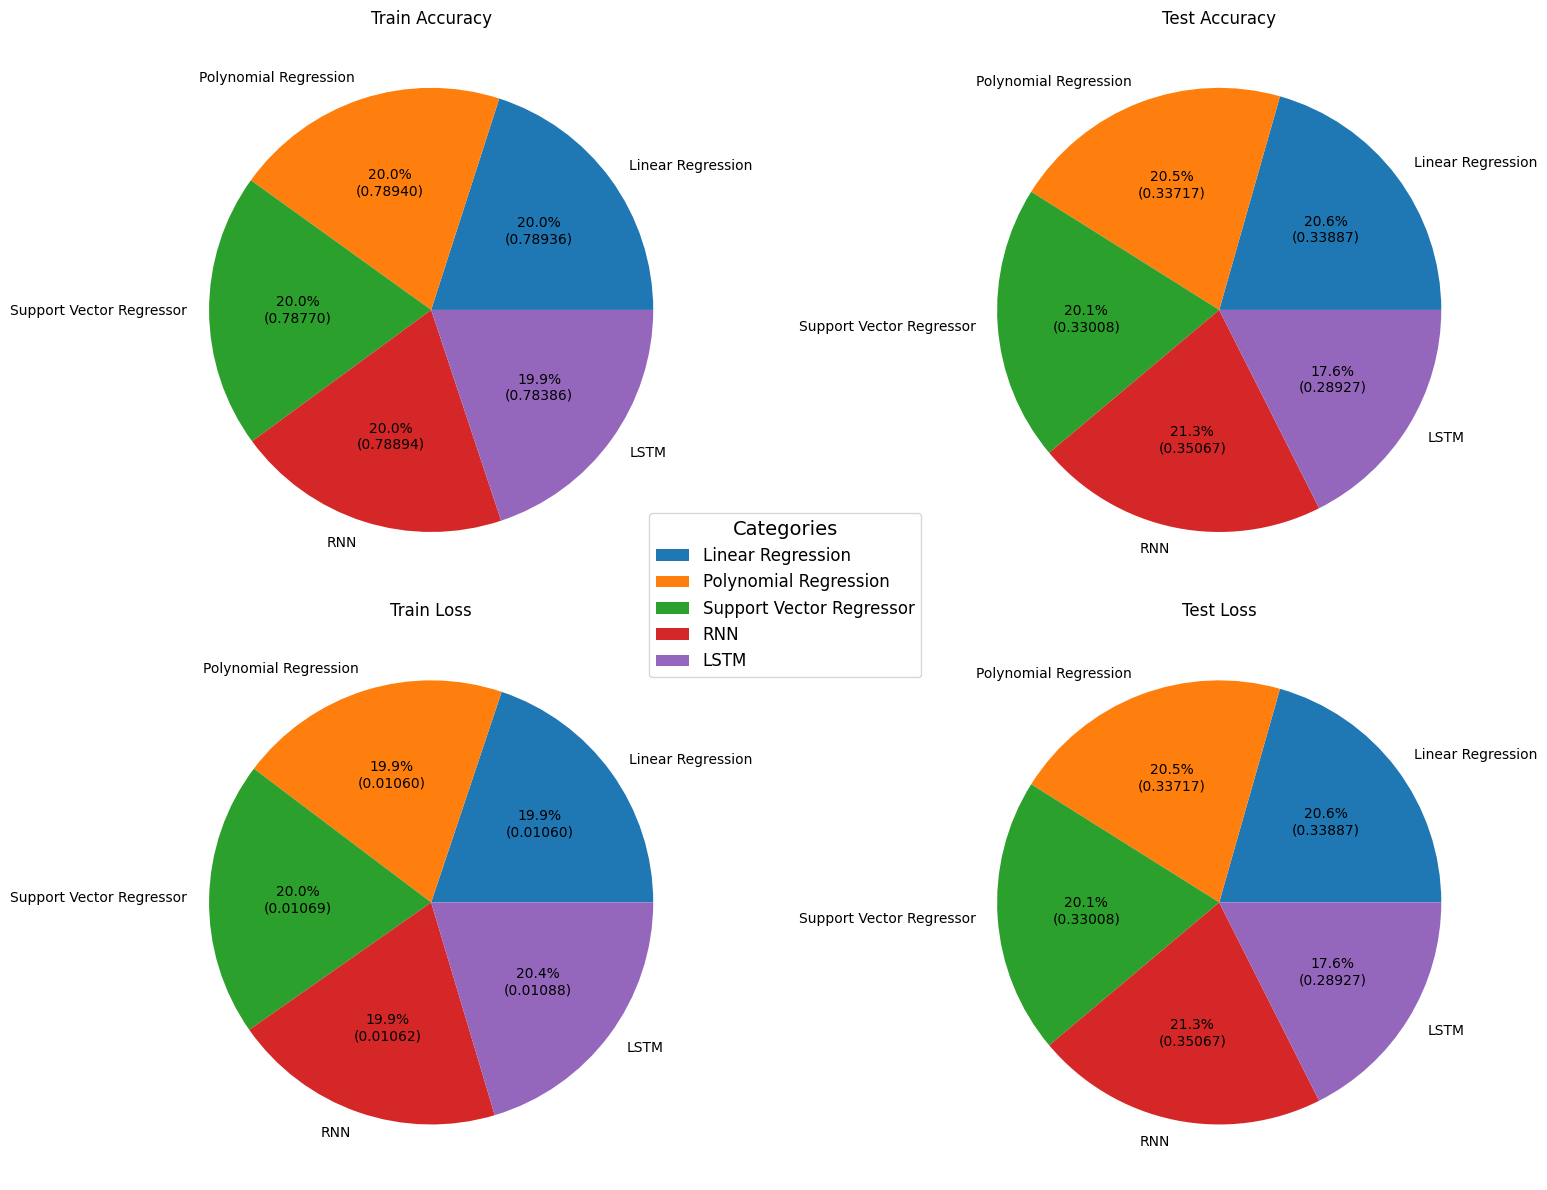

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
def autopct_format(pct, values):
    absolute = pct / 100.0 * sum(values)
    return f"{pct:.1f}%\n({absolute:.5f})"

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
axes[0, 0].pie(results['Train']['accuracy'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Train']['accuracy']))
axes[0, 0].set_title('Train Accuracy')
axes[0, 1].pie(results['Test']['accuracy'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Test']['accuracy']))
axes[0, 1].set_title('Test Accuracy')
axes[1, 0].pie(results['Train']['loss'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Train']['loss']))
axes[1, 0].set_title('Train Loss')
axes[1, 1].pie(results['Test']['loss'], labels=results.index, autopct=lambda pct: autopct_format(pct, results['Test']['loss']))
axes[1, 1].set_title('Test Loss')

fig.legend(
    results.index,
    loc='center',
    bbox_to_anchor=(0.5, 0.5),
    fontsize=12,
    title="Categories",
    title_fontsize=14
)
plt.tight_layout()
plt.show()